In [1]:
"""
Angel David Cuellar 18382
Baptiste Bauer 171501
Hoja de Trabajo 5
"""

import pandas as pd #Importamos pandas

datos = pd.read_excel('data.xlsx')  #Los datos están en esta hoja de excel
datos

,Temperatura,Vizcocidad
0,0.0,1.790
1,21.1,1.130
2,37.8,0.696
3,54.4,0.519
4,71.1,0.338
5,87.8,0.321
6,100.0,0.296


# INCISO 1.A

In [2]:
from numpy import * ##Importamos las librerías
from pylab import *
import scipy.interpolate as si
from sklearn.linear_model import LinearRegression


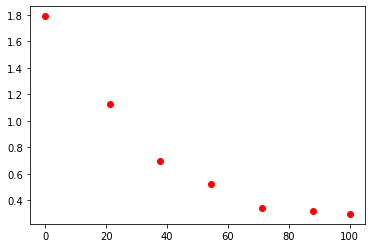

In [3]:
plot(datos.Temperatura, datos.Vizcocidad , "ro") #Graficamos los datos

In [4]:
x = datos.Temperatura #Le asignamos nombres a las diferentes variables de los datos
y = datos.Vizcocidad
P1 = poly1d(polyfit(x,y,len(x)-1))
P2 = si.lagrange(x,y)

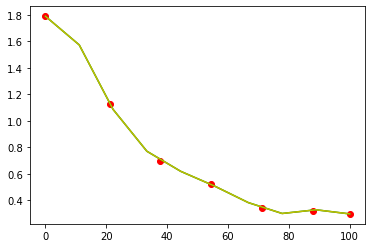

In [5]:
x1 = linspace(min(x),max(x),10) #Definimos un linspace en el cual mostraremps gráficas
plot(x,y,"ro",x1, P1(x1),"g",x1,P2(x1),"y") #Mostramos la gráfica

# INCISO 1.B

In [6]:
lista = (P1(10),P1(30),P1(60),P1(90)) #Defnimos dos listas, una con los antecedentes, otra con las imágenes de los antecentes de la función.
lista2 = (10,30,60,90)
imp = [lista2,lista]
pd.DataFrame(data = imp)


,0,1,2,3
0,10.000000,30.000000,60.000000,90.000000
1,1.620692,0.842478,0.457169,0.333423


# INCISO 1.C

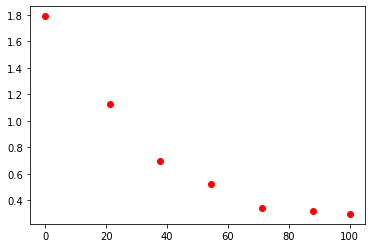

In [7]:
plot(datos.Temperatura, datos.Vizcocidad , "ro") #Mostramos la gráfica

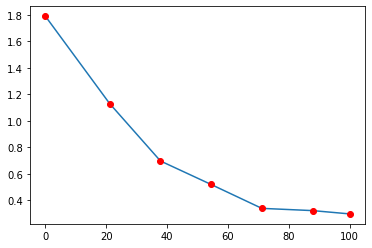

In [8]:
tck = si.splrep(datos.Temperatura,datos.Vizcocidad, k=1) #Realizamos el trazador
xnew = linspace(min(datos.Temperatura), max(datos.Temperatura),100)
ynew = si.splev(xnew, tck)
plot(xnew,ynew,datos.Temperatura, datos.Vizcocidad, "ro") #Lo graficamos

# INCISO 1.D


In [9]:
r1 = [10,30,60,90] #De la misma forma, tenemos la lista y encontramos los valores con el trazador. 
tck3 = si.splrep(datos.Temperatura,datos.Vizcocidad, k=1) #k=1 implica un trazador lineal
xnew = linspace(min(r1), max(r1),9)
ynew = si.splev(xnew, tck3)
imp = [xnew, ynew]
pd.DataFrame(data = imp) #Desplegamos los datos en forma de tabla

,0,1,2,3,4,5,6,7,8
0,10.000000,20.000000,30.000000,40.000000,50.000000,60.000000,70.000000,80.00000,90.000000
1,1.477204,1.164408,0.898707,0.672542,0.565916,0.458305,0.349922,0.32894,0.316492


# Las respuestas estan en la tabla
### 10 - 1.477
### 30 - 0.898
### 60 - 0.458
### 90 - 0.216

# INCISO 1.E

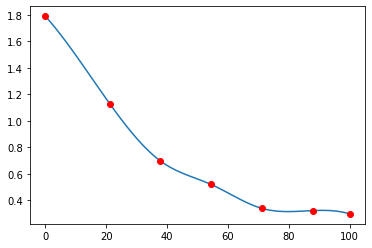

In [10]:
tck2 = si.splrep(datos.Temperatura,datos.Vizcocidad, k=3) #Esta vez, k=3 nos devuelve un trazador cúbico.
xnew2 = linspace(min(datos.Temperatura), max(datos.Temperatura),100)
ynew2 = si.splev(xnew2, tck2)
plot(xnew2,ynew2,datos.Temperatura, datos.Vizcocidad, "ro") #Graficamos el nuevo trazador

# INCISO 1.F

In [11]:
r2 = [10,30,60,90] #Encontramos los valores con el trazador cúbico. Se hace de la misma forma que en los incisos anteriores.
tck4 = si.splrep(datos.Temperatura,datos.Vizcocidad, k=3)
xnew3 = linspace(min(r2), max(r2),9)
ynew3 = si.splev(xnew3, tck4)
imp = [xnew3, ynew3]
pd.DataFrame(data = imp) #Desplegamos los datos con las respuestas en forma de tabla.

,0,1,2,3,4,5,6,7,8
0,10.000000,20.000000,30.000000,40.000000,50.000000,60.000000,70.000000,80.000000,90.000000
1,1.494759,1.165528,0.866654,0.662146,0.559615,0.454429,0.345869,0.313718,0.322577


# Las respuestas estan en la tabla
### 10 - 1.494
### 30 - 0.866
### 60 - 0.454
### 90 - 0.322

# INCISO 1.G

### primer metodo

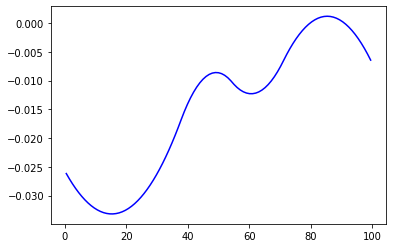

In [12]:
#Extraido de https://stackoverflow.com/questions/52957623/how-to-plot-the-derivative-of-a-plot-python
#CUIDADO SI SE CORRE MAS DE DOS VECES LA CASILLA SACA OTRA DERIVADA
dy = diff(ynew2) / diff(xnew2) #Para el primer método, derivamos la función y luego la graficamos.
dx = (array(xnew2)[:-1] + array(xnew2)[1:]) / 2 
plot(dx,dy,"b") #Se grafica.

### Segundo metodo

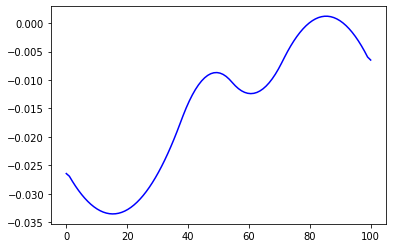

In [13]:
#CUIDADO SI SE CORRE MAS DE DOS VECES LA CASILLA SACA OTRA DERIVADA
ynew2 = gradient(ynew2) #El segundo método se hace con la función gradient. Ya que nuestra función solo es de una variable, es equivalente al primer método. 
plot(xnew2,ynew2,"b") #Se grafica.

# INCISO 1.H

## Razones de cambio

In [14]:
r3 = [10,30,60,90] #La razón de cambio se encuentra al evaluar al derivada de la función en el punto.
tck5 = si.splrep(datos.Temperatura,datos.Vizcocidad, k=3)
xnew4 = linspace(min(r3), max(r3),9)
ynew4 = si.splev(xnew4, tck5)
ynew4 = gradient(ynew4) 
imp = [xnew4, ynew4]
pd.DataFrame(data = imp) #Para dar más análisis sobre los datos, se desplega en forma de tabla.
#La respuesta es -0.251691

,0,1,2,3,4,5,6,7,8
0,10.000000,20.000000,30.000000,40.000000,50.000000,60.000000,70.000000,80.000000,90.000000
1,-0.329231,-0.314053,-0.251691,-0.153519,-0.103858,-0.106873,-0.070356,-0.011646,0.008859


# Las respuestas estan en la tabla
### 10 - 0.329
### 30 - 0.251
### 60 - 0.106
### 90 - 0.0088

# INCISO 2.A

In [15]:
#Intente meter toda la informacion en un solo excel pero no me abria la sheet2
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

datos2 = pd.read_excel('data2.xlsx')  #Abrimos la hoja de excel.
datos2 

,Tem,O
0,0,14.621
1,8,11.483
2,16,9.870
3,24,8.418
4,32,7.305
5,40,6.413


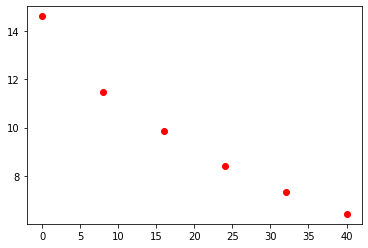

In [16]:
plot(datos2.Tem, datos2.O , "ro") #Primero graficamos los datos

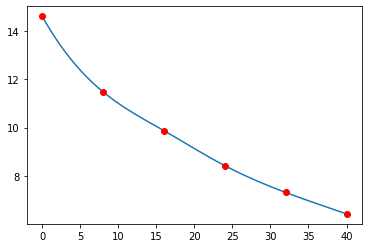

In [17]:
tra = si.splrep(datos2.Tem,datos2.O, k=3) #Hacemos el trazador. 
axisX = linspace(min(datos2.Tem), max(datos2.Tem),100) #Linspace
axisY = si.splev(axisX, tra)
plot(axisX,axisY,datos2.Tem, datos2.O, "ro") #Lo graficamos

# INCISO 2.B

In [18]:
r3 = [5,14,20] #Encontramos los datos con el trazador.
tck5 = si.splrep(datos2.Tem,datos2.O, k=3) #Es un trazador cúbico
xnew4 = linspace(min(r3), max(r3),11) 
ynew4 = si.splev(xnew4, tck5)
imp = [xnew4, ynew4]
pd.DataFrame(data = imp) #Desplegamos los datos en forma de tabla.

,0,1,2,3,4,5,6,7,8,9,10
0,5.000000,6.500000,8.000,9.50000,11.000000,12.500000,14.000000,15.500000,17.000000,18.500000,20.000000
1,12.384632,11.901093,11.483,11.11852,10.795822,10.503073,10.228442,9.960097,9.687047,9.408088,9.128325


# Las respuestas estan en la tabla
### 5 - 12.384
### 14 - 10.22
### 20 - 9.12

# INCISO 2.C

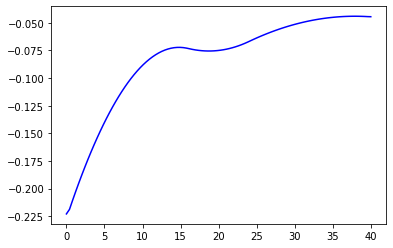

In [19]:
axisY = gradient(axisY) #Usamos el método del gradiente descrito en el primer problema.
plot(axisX, axisY, "b") #Lo graficamos

# INCISO 3.A

In [20]:
datos3 = pd.read_excel("data3.xlsx") #Importamos los datos de ecel
datos3

,h,p
0,0.000,1.0000
1,1.525,0.8617
2,3.050,0.7385
3,4.575,0.6292
4,6.100,0.5328
5,7.625,0.4481
6,9.150,0.3741


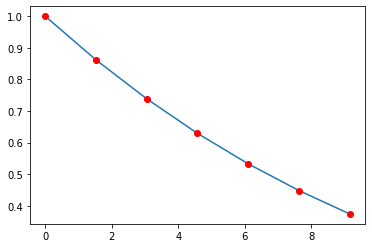

In [21]:
line = si.splrep(datos3.h,datos3.p, k=1) #Lo hacemos como en los incisos anteriores. Definimos un trazador lineal
axisX = linspace(min(datos3.h), max(datos3.h),100) #Hacemos un linspace
axisY = si.splev(axisX, line) 
plot(axisX,axisY,datos3.h, datos3.p, "ro") #Graficamos el trazador

In [22]:
var = [10.5,20.5,30.5] #Definimos una lista con los antecedentes
reg = si.splrep(datos3.h,datos3.p, k=3) #Definimos un trazador cúbico
xnew4 = linspace(min(var), max(var),11) #Hacemos un linspace
ynew4 = si.splev(xnew4, reg)
imp = [xnew4, ynew4] 
pd.DataFrame(data = imp) #Desplegamos los datos en la tabla

,0,1,2,3,4,5,6,7,8,9,10
0,10.500000,12.500000,14.500000,16.500000,18.500000,20.50000,22.50000,24.500000,26.500000,28.500000,30.5000
1,0.316775,0.244551,0.185625,0.137902,0.099289,0.06769,0.04101,0.017156,-0.005967,-0.030454,-0.0584


## para 10.5 - 0.316


# INCISO 3.B

In [23]:
last = [0.4,0.6] #Para calcular una razón de cambio, necesitamos una derivada y evaluarla.
reg2 = si.splrep(datos3.h,datos3.p, k=3) #Definimos un trazador cúbico
xnew4 = linspace(min(last), max(last),9) 
ynew4 = si.splev(xnew4, reg2)
ynew4 = gradient(ynew4) #La derivada se calcula mediante el gradiente.
imp = [xnew4, ynew4] 
pd.DataFrame(data = imp) #Los datos de la derivada están en la tabla

,0,1,2,3,4,5,6,7,8
0,0.400000,0.425000,0.45000,0.475000,0.500000,0.525000,0.550000,0.575000,0.600000
1,-0.002326,-0.002324,-0.00232,-0.002315,-0.002311,-0.002307,-0.002302,-0.002298,-0.002296


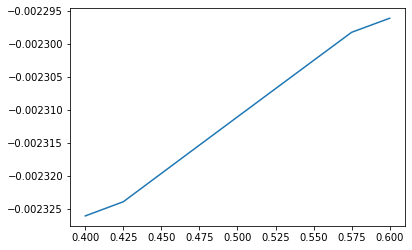

In [24]:
plot(xnew4,ynew4) #Mostramos la derivada. Nótese la escala en el eje y, es del orden de 10^-3

In [25]:
# Se puede ver que el cambio de 0.0023 es casi nulo por lo que podemos decir que es constante. El hecho de haber usado un trazador cúbico nos asegura más certeza sobre este resultado